In [1]:
import numpy as np
import scipy.io as sio
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
from scipy.signal import stft
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
file_path = 'C:\\Users\\UC\\Documents\\NeuMa\\22117124\\new.mat'
data = sio.loadmat(file_path)
eeg_data = data['EEG']
labels = data['label_list']


eeg_data_reshaped = np.transpose(eeg_data, (2, 1, 0))

# Apply STFT to EEG data
stft_data = np.abs(stft(eeg_data_reshaped, axis=1)[2])

# Flatten the STFT data
stft_data_flattened = stft_data.reshape(stft_data.shape[0], -1)

# Flatten the labels array
labels_flat = labels.flatten()

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
stft_data_resampled, labels_resampled = smote.fit_resample(stft_data_flattened, labels_flat)

# Check the shape of resampled data and labels
print("Shape of resampled data:", stft_data_resampled.shape)
print("Shape of resampled labels:", labels_resampled.shape)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(stft_data_resampled, labels_resampled, test_size=0.2, random_state=42)

# Define 2D CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(stft_data.shape[1], stft_data.shape[2], 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten()
])

# Reshape input data for CNN
X_train_cnn = X_train.reshape(-1, stft_data.shape[1], stft_data.shape[2], 1)
X_test_cnn = X_test.reshape(-1, stft_data.shape[1], stft_data.shape[2], 1)

# Extract features using CNN
X_train_features = model.predict(X_train_cnn)
X_test_features = model.predict(X_test_cnn)

# Define SVM and Random Forest classifiers
svm_clf = SVC(kernel='linear', probability=True)
rf_clf = RandomForestClassifier(n_estimators=100)

# Create a voting classifier
voting_clf = VotingClassifier(estimators=[('svm', svm_clf), ('rf', rf_clf)], voting='soft')

# Train the voting classifier
voting_clf.fit(X_train_features, y_train)

# Predict probabilities on test set
y_prob = voting_clf.predict_proba(X_test_features)[:, 1]

# Calculate AUC
auc = roc_auc_score(y_test, y_prob)
print("AUC:", auc)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Shape of resampled data: (13744, 9804)
Shape of resampled labels: (13744,)


C:\Users\UC\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


1375/1375 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step
344/344 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


ValueError: Found input variables with inconsistent numbers of samples: [43980, 10995]

In [2]:
import numpy as np
import scipy.io as sio
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
from scipy.signal import stft
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

file_path = 'C:\\Users\\UC\\Documents\\NeuMa\\22117124\\new.mat'
data = sio.loadmat(file_path)
eeg_data = data['EEG']
labels = data['label_list']

# Reshape EEG data to have samples as the first dimension
eeg_data_reshaped = np.transpose(eeg_data, (2, 1, 0))

# Apply STFT to EEG data
stft_data = np.abs(stft(eeg_data_reshaped, axis=1)[2])

# Flatten the STFT data
stft_data_flattened = stft_data.reshape(stft_data.shape[0], -1)

# Flatten the labels array
labels_flat = labels.flatten()

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
stft_data_resampled, labels_resampled = smote.fit_resample(stft_data_flattened, labels_flat)

# Check the shape of resampled data and labels
print("Shape of resampled data:", stft_data_resampled.shape)
print("Shape of resampled labels:", labels_resampled.shape)

# Split the resampled data and labels into training and test sets
X_train, X_test, y_train, y_test = train_test_split(stft_data_resampled, labels_resampled, test_size=0.2, random_state=42)

# Verify the shapes after splitting
print("Shape of training data:", X_train.shape)
print("Shape of training labels:", y_train.shape)
print("Shape of test data:", X_test.shape)
print("Shape of test labels:", y_test.shape)


Shape of resampled data: (13744, 9804)
Shape of resampled labels: (13744,)
Shape of training data: (10995, 9804)
Shape of training labels: (10995,)
Shape of test data: (2749, 9804)
Shape of test labels: (2749,)


AUC: 0.7811957776765569


TypeError: unsupported operand type(s) for |: 'Text' and 'str'

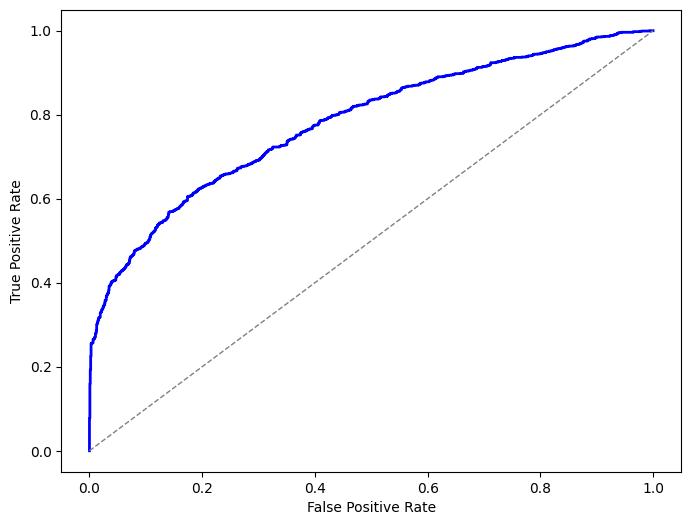

In [3]:
# Define SVM and Random Forest classifiers
svm_clf = SVC(kernel='linear', probability=True)
rf_clf = RandomForestClassifier(n_estimators=100)

# Create a voting classifier
voting_clf = VotingClassifier(estimators=[('svm', svm_clf), ('rf', rf_clf)], voting='soft')

# Train the voting classifier
voting_clf.fit(X_train, y_train)

# Predict probabilities on test set
y_prob = voting_clf.predict_proba(X_test)[:, 1]

# Calculate AUC
auc = roc_auc_score(y_test, y_prob)
print("AUC:", auc)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [5]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

# Predict labels on the test set
y_pred = voting_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall (sensitivity)
recall = recall_score(y_test, y_pred)

# Calculate specificity
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall (Sensitivity):", recall)
print("Specificity:", specificity)


Accuracy: 0.6886140414696253
Precision: 0.6648501362397821
Recall (Sensitivity): 0.7283582089552239
Specificity: 0.6508161816891412


In [9]:
import numpy as np
import scipy.io as sio
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, precision_score, recall_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from scipy.signal import stft
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from scikeras.wrappers import KerasClassifier
import matplotlib.pyplot as plt

# Load the data
file_path = 'C:\\Users\\UC\\Documents\\NeuMa\\22117124\\new.mat'
data = sio.loadmat(file_path)
eeg_data = data['EEG']
labels = data['label_list']

# Reshape EEG data to have samples as the first dimension
eeg_data_reshaped = np.transpose(eeg_data, (2, 1, 0))

# Apply STFT to EEG data
stft_data = np.abs(stft(eeg_data_reshaped, axis=1)[2])

# Flatten the STFT data
stft_data_flattened = stft_data.reshape(stft_data.shape[0], -1)

# Flatten the labels array
labels_flat = labels.flatten()

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
stft_data_resampled, labels_resampled = smote.fit_resample(stft_data_flattened, labels_flat)

# Check the shape of resampled data and labels
print("Shape of resampled data:", stft_data_resampled.shape)
print("Shape of resampled labels:", labels_resampled.shape)

# Split the resampled data and labels into training and test sets
X_train, X_test, y_train, y_test = train_test_split(stft_data_resampled, labels_resampled, test_size=0.2, random_state=42)

# Verify the shapes after splitting
print("Shape of training data:", X_train.shape)
print("Shape of training labels:", y_train.shape)
print("Shape of test data:", X_test.shape)
print("Shape of test labels:", y_test.shape)

# Function to create DNN model
def create_dnn_model():
    model = Sequential()
    model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap the DNN model for use in scikit-learn
dnn_clf = KerasClassifier(model=create_dnn_model, epochs=20, batch_size=32, verbose=0)

# Define SVM and Random Forest classifiers
svm_clf = SVC(kernel='linear', probability=True)
rf_clf = RandomForestClassifier(n_estimators=100)

# Create a voting classifier including the DNN model
voting_clf = VotingClassifier(estimators=[('svm', svm_clf), ('rf', rf_clf), ('dnn', dnn_clf)], voting='soft')

# Train the voting classifier
voting_clf.fit(X_train, y_train)

# Predict probabilities on test set
y_prob = voting_clf.predict_proba(X_test)[:, 1]

# Calculate AUC
auc = roc_auc_score(y_test, y_prob)
print("AUC:", auc)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Predict labels on the test set
y_pred = voting_clf.predict(X_test)

# Calculate accuracy, precision, recall (sensitivity), and specificity
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall (Sensitivity):", recall)
print("Specificity:", specificity)


KeyboardInterrupt: 